## WOMENS CLOTHES E-COMMERCE REVIEWS

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
data = pd.read_csv('womens_clothing_reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#### SOME BASIC ANALYSIS

In [3]:
print('Number of rows : ', data.shape[0])
print('Number of columns : ', data.shape[1])

Number of rows :  23486
Number of columns :  11


In [4]:
print('Information of columns')
data.info()

Information of columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
print('Null values of columns')
data.isna().sum()

Null values of columns


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
print('Duplicate values of columns')
data.duplicated().value_counts()

Duplicate values of columns


False    23486
dtype: int64

In [7]:
print('Unique values of some columns')
print('Division Name unique values : ', data['Division Name'].unique())
print('Department Name unique values : ', data['Department Name'].unique())
print('Class Name unique values : ', data['Class Name'].unique())

Unique values of some columns
Division Name unique values :  ['Initmates' 'General' 'General Petite' nan]
Department Name unique values :  ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
Class Name unique values :  ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


### RENAME COLUMNS

In [8]:
data = data.rename(columns={"Review Text": "review", "Recommended IND": "recommended",
                            "Clothing ID": "cloth_id", "Positive Feedback Count": "feedbacks",
                            "Division Name": "division", "Department Name": "department",
                            "Class Name": "class", "Rating": "rating", "Age": "age",
                            "Title": "title"})

In [9]:
data.columns

Index(['Unnamed: 0', 'cloth_id', 'age', 'title', 'review', 'rating',
       'recommended', 'feedbacks', 'division', 'department', 'class'],
      dtype='object')

### SOME DETAIL ANALYSIS OF COLUMNS

**UNNAMED: 0**

In [10]:
data['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
23481    23481
23482    23482
23483    23483
23484    23484
23485    23485
Name: Unnamed: 0, Length: 23486, dtype: int64

Unnecessary unique values in that column

In [11]:
data.drop('Unnamed: 0', axis=1, inplace=True)

**CLOTHING ID**

In [12]:
data['cloth_id'].nunique()

1206

There's also too much distinct value 

In [13]:
data.drop('cloth_id', axis=1, inplace=True)

**REVIEW TEXT**

In [14]:
data['review']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review, Length: 23486, dtype: object

Will detailly analyzed ( punctiations, stopwords, unnecessary text)

**RECOMMENDED IND**

In [15]:
data['recommended'].value_counts()

1    19314
0     4172
Name: recommended, dtype: int64

C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recommended', ylabel='count'>

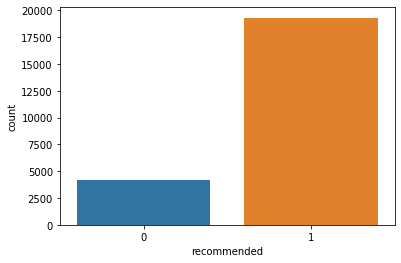

In [16]:
sns.countplot(data['recommended'])

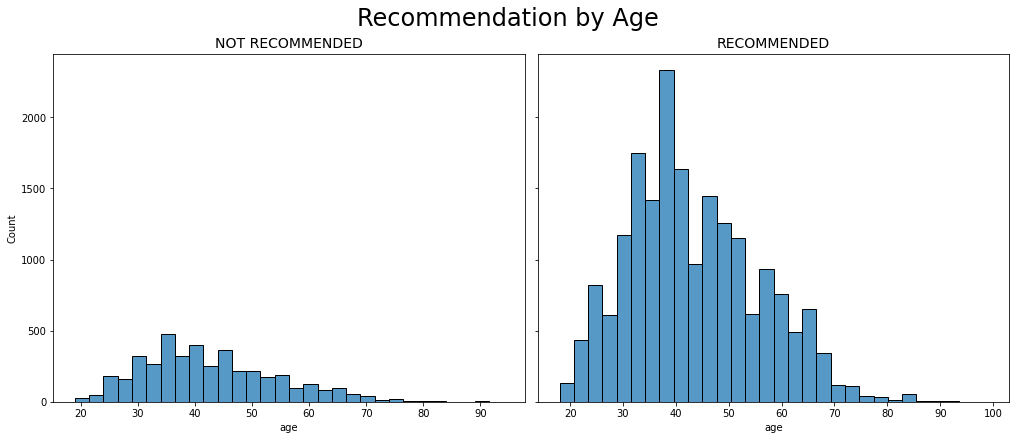

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6), constrained_layout=True, sharey=True)

#Graphs
age_recommended = sns.histplot(data=data[data['recommended']==1], x='age', bins=30, ax=axes[1])
age_not_recommended = sns.histplot(data=data[data['recommended']==0], x='age', bins=30, ax=axes[0])

figtitle = fig.suptitle('Recommendation by Age',fontsize=24)
axeszero_title = axes[0].set_title('NOT RECOMMENDED', fontsize=14)
axesone_title = axes[1].set_title('RECOMMENDED', fontsize=14)
plt.show()

**POSITIVE FEEDBACK COUNT**

In [18]:
data['feedbacks'].value_counts()

0      11176
1       4043
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: feedbacks, Length: 82, dtype: int64

<AxesSubplot:>

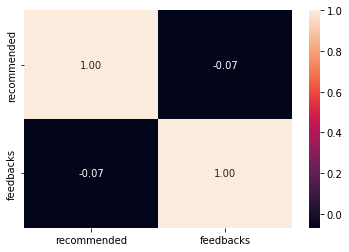

In [19]:
# calculate the correlation matrix
corr = data[['recommended', 'feedbacks']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True, 
        fmt = ".2f")

**DIVISION NAME**

In [20]:
data['division'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: division, dtype: int64

C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='division', ylabel='count'>

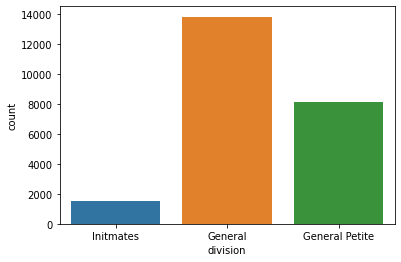

In [21]:
sns.countplot(data['division'])

**DEPARTMENT NAME**

In [22]:
data['department'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department, dtype: int64

C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='department', ylabel='count'>

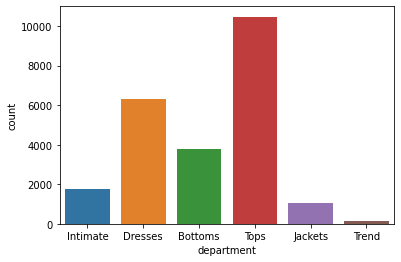

In [23]:
sns.countplot(data['department'])

**CLASS NAME**

In [24]:
data['class'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class, dtype: int64

Some merge operations would be nice

**RATING**

In [25]:
data['rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

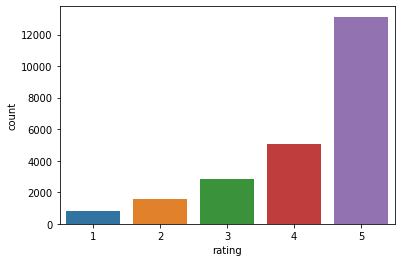

In [34]:
sns.countplot(data['rating'])

<AxesSubplot:>

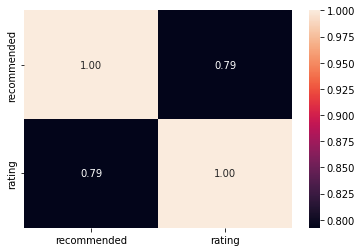

In [26]:
# calculate the correlation matrix
corr = data[['recommended', 'rating']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True, 
        fmt = ".2f")

**AGE**

In [27]:
data['age'].value_counts()

39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: age, Length: 77, dtype: int64

Most probably unnecessary

**TITLE**

In [28]:
data['title'].value_counts()

Love it!                                   136
Beautiful                                   95
Love                                        88
Love!                                       84
Beautiful!                                  72
                                          ... 
Perfect transition dress                     1
The perfect spring dress!                    1
Super soft but can make you look frumpy      1
More structured than a cardi                 1
Please make more like this one!              1
Name: title, Length: 13993, dtype: int64

Would be so useful

**SOME NEW FEATURES**

* Length of the reviews

In [43]:
data["length_reviews"] = data["review"].str.len()

In [45]:
# some NAN and float object appears
data["length_reviews"].isna().value_counts()

False    22641
True       845
Name: length_reviews, dtype: int64

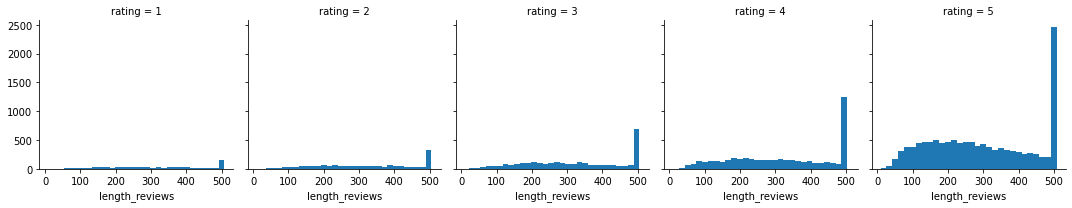

In [47]:
# check realtionship between length of reviews and rating
d = sns.FacetGrid(data, col='rating')
d.map(plt.hist,'length_reviews',bins=30)

* Tokens of the reviews

In [51]:
def extract_tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [53]:
data['review'] = data['review'].astype('str')
data['tokens_reviews'] = data['review'].apply(extract_tokens)

#### REMOVE STOP WORDS

will be added before positive and negative review extraction

#### REMOVE PUNCS

will be added before positive and negative review extraction

* Merge reviews

In [56]:
reviews = data[['review', 'tokens_reviews', 'recommended']]

* Positive and Negative Reviews

In [58]:
positive = reviews[reviews['recommended']== 1]
positive_words = []

for review in positive['tokens_reviews']:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)

positive_words[:100]

'absolutely wonderful silky and sexy and comfortable love this dress it s sooo pretty i happened to f'

In [59]:
negative = reviews[reviews['recommended']== 0]
negative_words = []

for review in negative['tokens_reviews']:
    negative_words.append(review)
negative_words = ' '.join(negative_words)

negative_words[:100]

'i had such high hopes for this dress and really wanted it to work for me i initially ordered the pet'

### WORDCLOUD WILL BE ADDED